In [66]:
pip install chart_studio



  Using cached chart_studio-1.1.0-py3-none-any.whl (64 kB)
  Using cached retrying-1.3.3.tar.gz (10 kB)

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=0ec95fe0a769f461fd578e1556d9724da3d349de6d6674fd38285eafc1458500
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\ce\18\7f\e9527e3e66db1456194ac7f61eb3211068c409edceecff2d31
Successfully built retrying


In [67]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [68]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# 532746.BO.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('532746.BO.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = '532746.BO.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 7 columns


In [69]:
df1.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-06-12,130.000000,130.000000,92.419998,94.339996,94.339996,8097280
1,2006-06-13,93.059998,94.940002,77.120003,78.540001,78.540001,7475940
2,2006-06-14,80.000000,88.580002,74.209999,82.029999,82.029999,6582600
3,2006-06-19,88.019997,94.720001,82.269997,92.680000,92.680000,6085285
4,2006-06-20,89.940002,92.400002,86.800003,89.839996,89.839996,3506755


In [70]:
plotPerColumnDistribution(df1, 10, 5)

<Figure size 2400x512 with 0 Axes>

C:\Users\Acer\AppData\Local\Temp/ipykernel_5800/3510424060.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



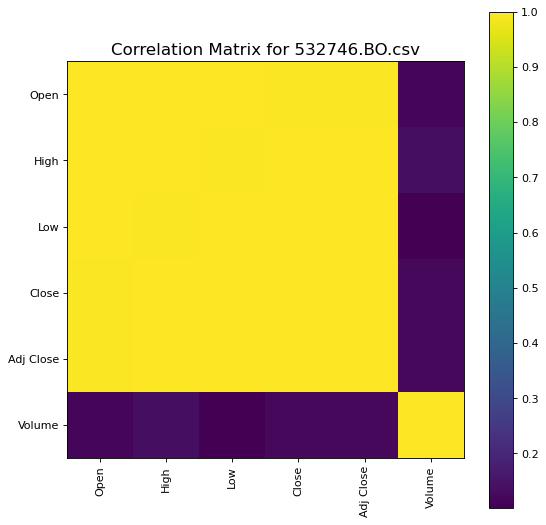

In [71]:
plotCorrelationMatrix(df1, 8)

In [72]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [73]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [74]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [75]:
plotPerColumnDistribution(df1, 10, 5)

<Figure size 2400x512 with 0 Axes>

C:\Users\Acer\AppData\Local\Temp/ipykernel_5800/3510424060.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



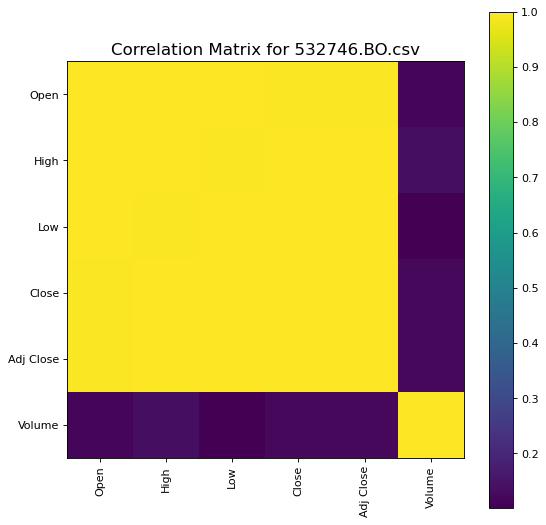

In [76]:
plotCorrelationMatrix(df1, 8)

C:\Users\Acer\AppData\Local\Temp/ipykernel_5800/102845399.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



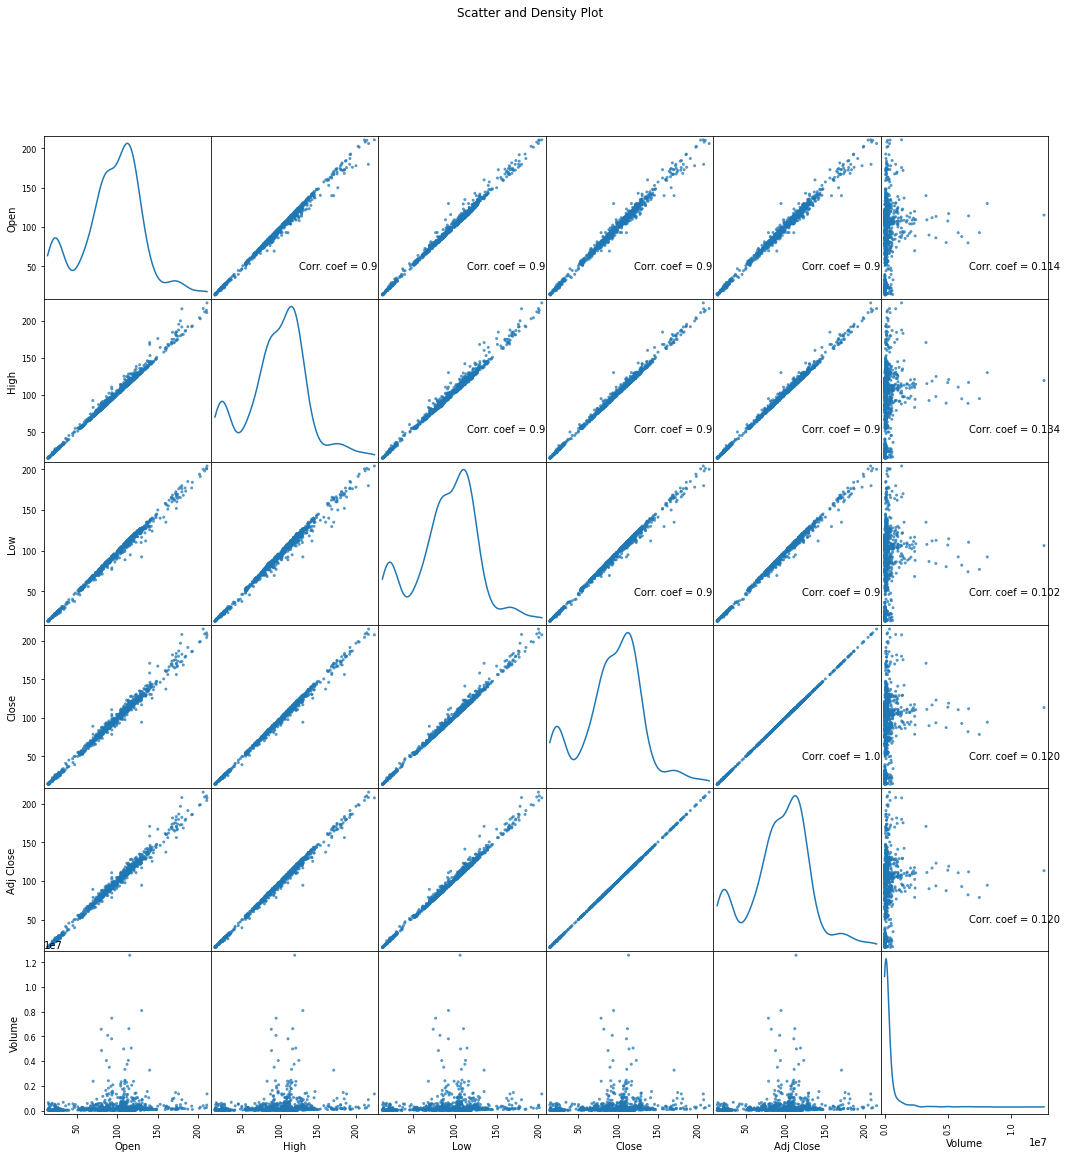

In [77]:
plotScatterMatrix(df1, 18, 10)

In [78]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# 5PAISA.NS.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('5PAISA.NS.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = '5PAISA.NS.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 624 rows and 7 columns


In [79]:
df2.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-16,243.289993,243.289993,231.126007,231.126007,231.126007,44615
1,2017-11-17,219.569000,219.569000,219.569000,219.569000,219.569000,3799
2,2017-11-20,208.621002,208.621002,208.591003,208.591003,208.591003,1506
3,2017-11-21,198.190002,198.190002,198.190002,198.190002,198.190002,1366
4,2017-11-22,188.307007,188.307007,188.307007,188.307007,188.307007,1556


In [80]:
plotPerColumnDistribution(df2, 10, 5)

<Figure size 2400x512 with 0 Axes>

C:\Users\Acer\AppData\Local\Temp/ipykernel_5800/3510424060.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



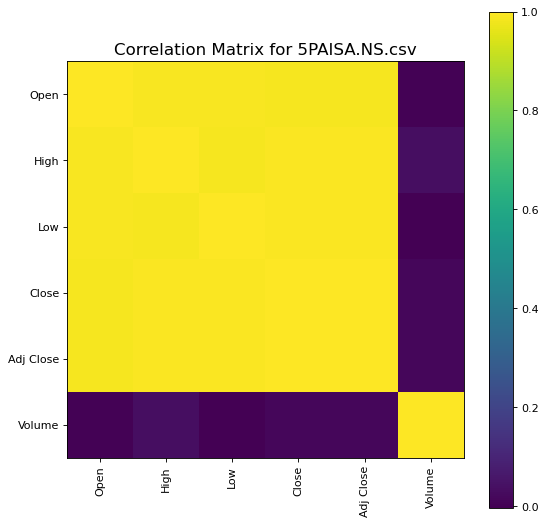

In [81]:
plotCorrelationMatrix(df2, 8)

C:\Users\Acer\AppData\Local\Temp/ipykernel_5800/102845399.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



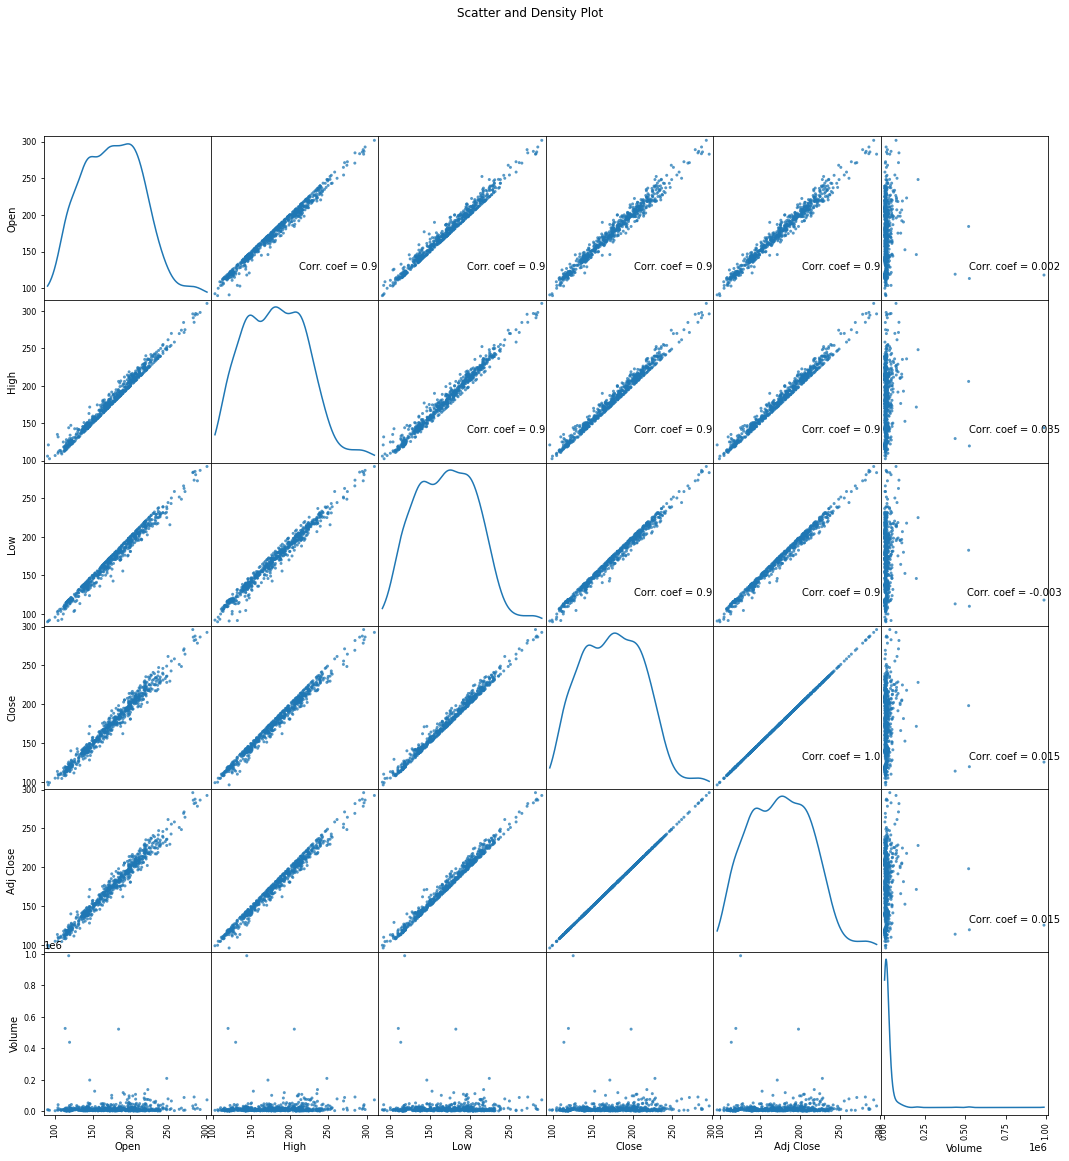

In [82]:
plotScatterMatrix(df2, 18, 10)

In [83]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# 20MICRONS.BO.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('20MICRONS.BO.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = '20MICRONS.BO.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 7 columns


In [84]:
df3.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-10-06,25.000,48.125,15.750,16.650,13.664763,25826400
1,2008-10-07,16.850,18.975,13.825,15.200,12.474738,8742400
2,2008-10-08,13.775,14.475,12.625,13.175,10.812808,2941200
3,2008-10-10,11.000,12.450,10.750,11.675,9.581747,1362600
4,2008-10-13,12.000,13.350,11.925,12.475,10.238314,878000


In [85]:
plotPerColumnDistribution(df3, 10, 5)

<Figure size 2400x512 with 0 Axes>

C:\Users\Acer\AppData\Local\Temp/ipykernel_5800/3510424060.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



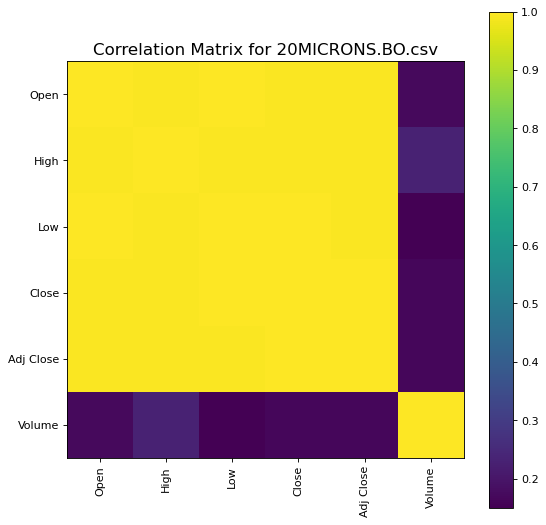

In [86]:
plotCorrelationMatrix(df3, 8)

C:\Users\Acer\AppData\Local\Temp/ipykernel_5800/102845399.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



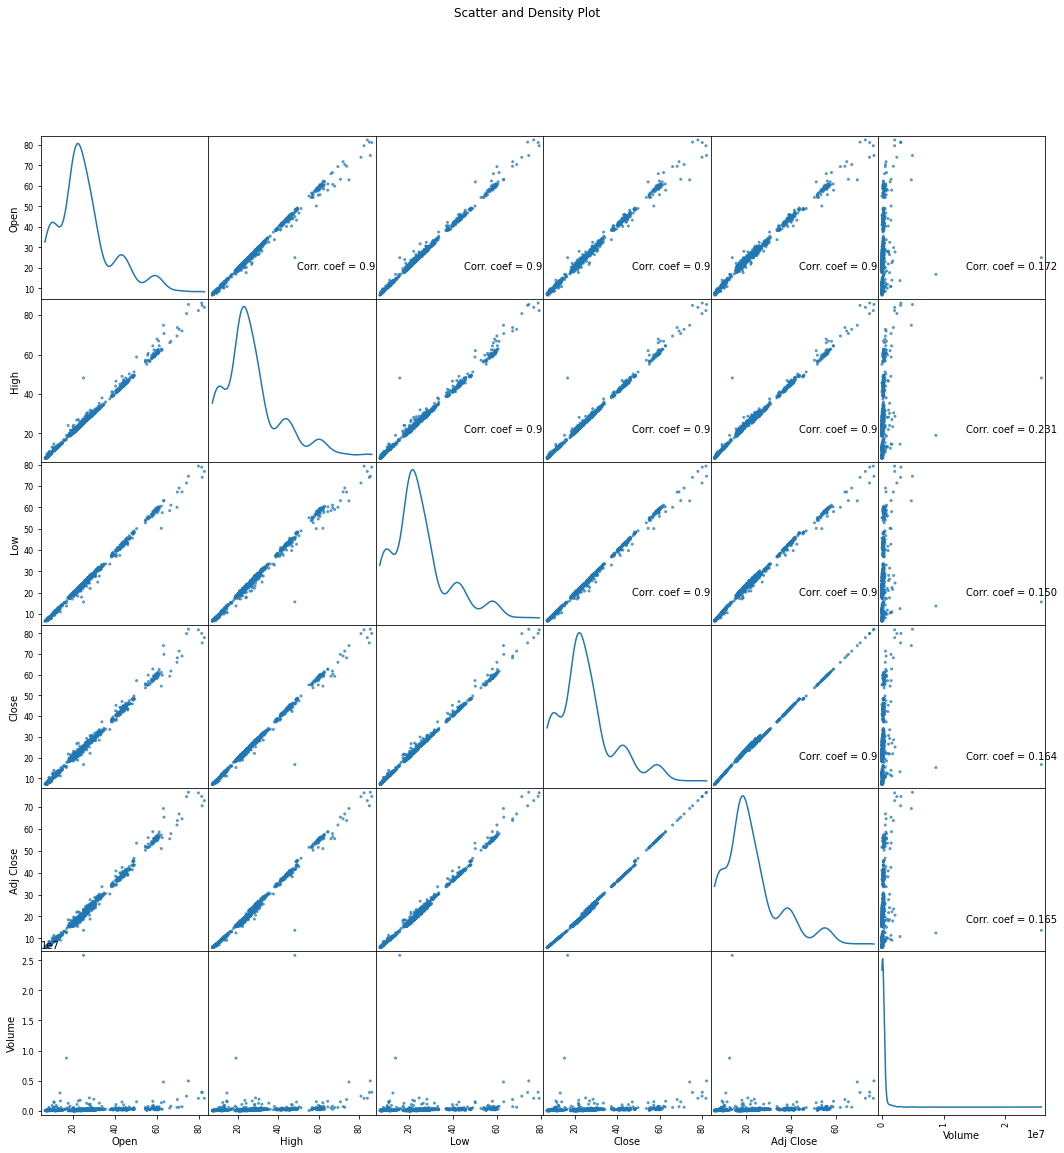

In [87]:
plotScatterMatrix(df3, 18, 10)

In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1000 non-null   object 
 1   Open       1000 non-null   float64
 2   High       1000 non-null   float64
 3   Low        1000 non-null   float64
 4   Close      1000 non-null   float64
 5   Adj Close  1000 non-null   float64
 6   Volume     1000 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 54.8+ KB


In [89]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [90]:
print(f'Dataframe contains stock prices between {df1.Date.min()} {df1.Date.max()}')
print(f'Totaldays = {(df1.Date.max() - df1.Date.min()).days} days')

Dataframe contains stock prices between 2006-06-12 00:00:00 2010-07-14 00:00:00
Totaldays = 1493 days


In [91]:
df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,93.080360,95.466270,90.289850,92.655950,92.655950,3.301438e+05
std,37.998450,39.022658,36.897481,37.985424,37.985424,8.235784e+05
min,13.600000,14.600000,13.400000,13.900000,13.900000,0.000000e+00
25%,74.467503,76.599998,71.824999,74.549997,74.549997,5.101625e+04
50%,97.000000,100.735001,94.320000,96.300003,96.300003,1.138675e+05
75%,117.192501,119.820002,114.450001,116.887499,116.887499,2.645112e+05
max,210.910004,224.000000,204.000000,214.809998,214.809998,1.257199e+07


<AxesSubplot:>

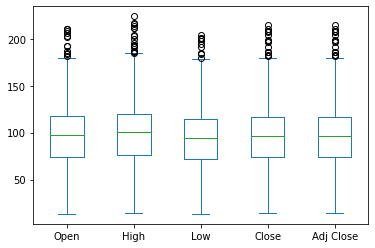

In [92]:
df1[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')

In [93]:
#setting the layout for our plot
layout = go.Layout(
    title = 'Stock Prices of 1st Company',
    xaxis= dict(
        title = 'Date',
        titlefont=dict(
            family = 'Courier New, monospace',
            size = 18,
            color = '#7f7f7f'
        )
    ),
    yaxis = dict(
        title = 'Price',
        titlefont = dict(
            family = 'Courier New, monospace',
            size = 18,
            color = '#7f7f7f'
        )
    )
    
)
df1_data = [{'x': df1['Date'], 'y': df1['Close']}]
plot = go.Figure(data=df1_data, layout = layout)

In [94]:
#plotting offline
iplot(plot)

In [95]:
#building the regression model
from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [96]:
#Split the data into train and test sets
X = np.array(df1.index).reshape(-1,1)
Y = df1['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [97]:
#Feature Scaling
scaler = StandardScaler().fit(X_train)

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
#creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [102]:
#plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
df1_data = [trace0, trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data = df1_data, layout = layout)

In [103]:
iplot(plot2)

In [105]:
#calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.05674436129562355	0.04886211576779376
MSE       1376.3340524829628	1330.680692498559

